In [2]:
import pandas as pd 
import numpy as np 
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("/home/blue/code/graph_permutation")

In [11]:
edges_df = pd.read_csv("data/edges.csv", index_col=0)
node_df = pd.read_csv("data/nodes.csv")
base_graph = nx.Graph()
base_graph.add_edges_from(zip(edges_df.src, edges_df.dst))
n_nodes = len(base_graph.nodes)
n_edges = len(base_graph.edges)
cancer_proteins = node_df[node_df.is_cancer_protein].node_name

In [12]:
cancer_one_hop_set = set()
for cancer_protein in cancer_proteins:
    neighbors = set(dict(base_graph[cancer_protein]).keys())
    #cancer_one_hop_set = cancer_one_hop_set.union(neighbors)

In [137]:

cancer_degree_df = pd.concat((cancer_proteins_in_subnetwork, 
                     cancer_proteins_in_subnetwork.map(nx.degree(cancer_one_hop_subgraph))), axis=1)
cancer_degree_df.columns = ["center", "degree"]
# 採升序排序讓小的節點優先和degree相近的節點合併
sorted_cancer_degree_df = cancer_degree_df.sort_values(by="degree")
sorted_cancer_degree_df['nodes'] = sorted_cancer_degree_df['center'].apply(lambda node: np.array([node] + list(cancer_one_hop_subgraph.neighbors(node))))
sorted_cancer_degree_df['center'] = sorted_cancer_degree_df['center'].apply(lambda node: np.array([node]))
sorted_cancer_degree_df.index = range(len(sorted_cancer_degree_df))
sorted_cancer_degree_df.index.name = "community_index"
sorted_cancer_degree_df

,center,degree,nodes
community_index,,,
0,[ENSP00000358488],5,"[ENSP00000358488, ENSP00000343223, ENSP0000045..."
1,[ENSP00000469011],5,"[ENSP00000469011, ENSP00000268383, ENSP0000035..."
2,[ENSP00000252971],5,"[ENSP00000252971, ENSP00000240316, ENSP0000035..."
3,[ENSP00000383185],8,"[ENSP00000383185, ENSP00000222390, ENSP0000026..."
4,[ENSP00000355060],8,"[ENSP00000355060, ENSP00000223023, ENSP0000022..."
...,...,...,...
683,[ENSP00000482313],1394,"[ENSP00000482313, ENSP00000005386, ENSP0000001..."
684,[ENSP00000281043],1412,"[ENSP00000281043, ENSP00000008391, ENSP0000004..."
685,[ENSP00000263377],1570,"[ENSP00000263377, ENSP00000001008, ENSP0000000..."


In [139]:
# L1 community
def merge(df, i, j):
    merged_nodes = np.unique(np.concatenate((df.loc[i, "nodes"], df.loc[j, "nodes"])))
    merged_degree = df.loc[i, "degree"] + df.loc[j, "degree"]
    center1 = df.loc[i, "center"]
    center2 = df.loc[j, "center"]
    merged_center = np.concatenate((center1, center2))
    df.at[i, "nodes"] = merged_nodes
    df.at[i, "degree"] = merged_degree
    df.at[i, "center"] = merged_center
    df.drop(j, inplace=True)
    df.index = range(len(df))


count = 0
merged = True
# 執行多輪直到沒有合併發生
while merged:
    merged = False
    i = 0
    while i < len(sorted_cancer_degree_df)-1:
        j = i + 1 
        while j < len(sorted_cancer_degree_df):
            community1 = sorted_cancer_degree_df.loc[i, "nodes"]
            community2 = sorted_cancer_degree_df.loc[j, "nodes"]
            ratio = np.isin(community1, community2).sum() / len(community2) # 避免小的全部被合併

            if ratio >= 0.5:
                
                merge(sorted_cancer_degree_df, i, j)
                merged = True  # 表示有合併發生
                print(ratio, i, j, "merged")
                count += 1
            j += 1
        i += 1
count

0.5543478260869565 353 425 merged
0.5643564356435643 353 458 merged
0.5830903790087464 353 568 merged
0.5740740740740741 353 615 merged
0.5454545454545454 495 566 merged
0.553072625698324 569 572 merged
0.5511182108626198 613 620 merged
0.5327816677275621 639 640 merged
0.5103448275862069 353 358 merged
0.5316455696202531 353 382 merged
0.5125 353 386 merged
0.5795454545454546 353 410 merged
0.5 353 411 merged
0.648936170212766 353 429 merged
0.5526315789473685 353 430 merged
0.6113989637305699 353 433 merged
0.6426666666666667 353 434 merged
0.7044534412955465 353 439 merged
0.655 353 441 merged
0.5024875621890548 353 442 merged
0.5074626865671642 353 443 merged
0.5756097560975609 353 445 merged
0.5336538461538461 353 447 merged
0.6006191950464397 353 450 merged
0.6244131455399061 353 453 merged
0.5727699530516432 353 454 merged
0.5 353 455 merged
0.555045871559633 353 457 merged
0.6742081447963801 353 459 merged
0.57847533632287 353 460 merged
0.5991189427312775 353 463 merged
0.6739

295

In [143]:
sorted_cancer_degree_df.sort_values(by="degree", ascending=False).head(20)

,center,degree,nodes
353,"[ENSP00000262189, ENSP00000301067, ENSP0000047...",104943,"[ENSP00000000233, ENSP00000000412, ENSP0000000..."
276,"[ENSP00000498881, ENSP00000364270, ENSP0000031...",393,"[ENSP00000005587, ENSP00000013807, ENSP0000021..."
151,"[ENSP00000386834, ENSP00000378578, ENSP0000026...",392,"[ENSP00000181839, ENSP00000216297, ENSP0000021..."
287,"[ENSP00000406490, ENSP00000265849, ENSP0000023...",375,"[ENSP00000013807, ENSP00000054666, ENSP0000021..."
146,"[ENSP00000330875, ENSP00000289081, ENSP0000036...",370,"[ENSP00000013807, ENSP00000037243, ENSP0000005..."
265,"[ENSP00000372689, ENSP00000218089]",229,"[ENSP00000218089, ENSP00000221419, ENSP0000022..."
177,"[ENSP00000333012, ENSP00000414516, ENSP0000044...",202,"[ENSP00000006526, ENSP00000064778, ENSP0000008..."
242,"[ENSP00000405004, ENSP00000241416]",172,"[ENSP00000064780, ENSP00000166139, ENSP0000021..."
352,[ENSP00000379616],141,"[ENSP00000379616, ENSP00000037502, ENSP0000021..."
351,[ENSP00000236959],141,"[ENSP00000236959, ENSP00000196371, ENSP0000020..."


In [150]:
# merge 情況
sorted_cancer_degree_df.center.apply(lambda x: len(x)).sort_values(ascending=False).head(15)

353    318
146      4
151      4
287      3
276      3
177      3
265      2
90       2
176      2
242      2
58       2
6        1
236      1
243      1
241      1
Name: center, dtype: int64

In [ ]:
# K-3 motif
cancer_one_hop_subgraph = base_graph.subgraph(cancer_one_hop_set)
cancer_one_hop_arr = np.array(cancer_one_hop_subgraph.nodes)
cancer_proteins_in_subnetwork = cancer_proteins[cancer_proteins.isin(cancer_one_hop_arr)]
count = 0
motif_list = []
for n1 in cancer_proteins_in_subnetwork:
    for n2 in cancer_one_hop_subgraph[n1]:
        for n3 in cancer_one_hop_subgraph[n2]:
            if n1 in cancer_one_hop_subgraph[n3]:
                motif_list.append((n1, n2, n3))
                count += 1
count

In [6]:
# 去除重複的 A-B-C = A-C-B 利用set完成排序後去除
deduplicate_motif_list = set([tuple(set(motif)) for motif in motif_list])
motif_df = pd.DataFrame(deduplicate_motif_list, columns=["n1", "n2", "n3"])
motif_df.head()
motif_df.to_csv("output/motif.csv")

In [7]:
# motif 的邊列表
motif_edges_df = pd.DataFrame(columns=["n1n2", "n2n3", "n3n1"])
motif_edges_df["n1n2"] = motif_df.n1 + "-" + motif_df.n2 
motif_edges_df["n2n3"] = motif_df.n2 + "-" + motif_df.n3
motif_edges_df["n3n1"] = motif_df.n3 + "-" + motif_df.n1 
motif_edges_df.to_csv("output/motif_edges_df.csv")

In [13]:
motif_df = pd.read_csv("output/motif.csv", index_col=0)
motif_edges_df = pd.read_csv("output/motif_edges_df.csv", index_col=0)

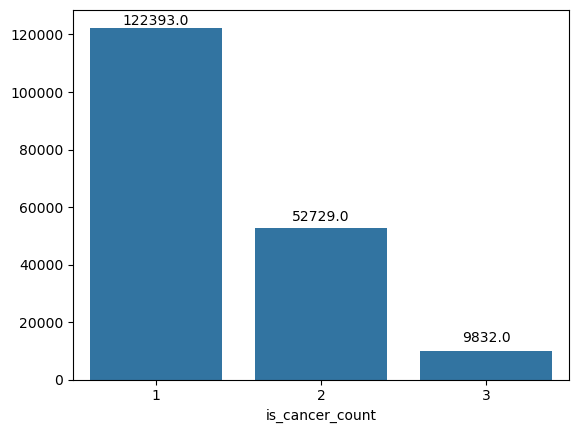

In [14]:
# 查看k-3 motif 的不同模式數量並繪圖
motif_df["is_cancer_count"] = motif_df.isin(cancer_proteins.values).sum(axis=1)
size = motif_df.groupby("is_cancer_count").size()

ax = sns.barplot(size)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()*0.98),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [77]:
result_dict = {}
for i in motif_df.index:
    result_dict[i] = []

In [15]:
import json
# permutation
n_permutation = 100
node_dict = node_df.node_name.to_dict()

n_nodes = len(base_graph.nodes)
n_edges = len(base_graph.edges)
result_dict = {}

n_permutation = 1000
#result_df = pd.DataFrame(index=motif_df.index)
for i in range(n_permutation):
    print(i, end=",")
    # 產生隨機網路
    random_graph = nx.gnm_random_graph(n_nodes, n_edges)
    random_graph = nx.relabel_nodes(random_graph, node_dict) # 重抓1-hop subgraph
    random_one_hop_subgraph = nx.subgraph(random_graph, cancer_one_hop_set) # 將網路標上標籤
    random_edge_df = pd.DataFrame(random_one_hop_subgraph.edges, columns=["src", "dst"]) #  
    random_edge_df["edge"] = random_edge_df.src + "-" + random_edge_df.dst  # 
    #result_df[i] = motif_edges_df.isin(random_edge_df.edge.values).all(axis=1)
    
    # random_edges_arr = np.array(random_one_hop_subgraph.edges)
    # mask = motif_edges_df.isin(random_edges_arr).all(axis=1)
    
    # 我們查看先前找出來的motif的三個邊，若三個邊都存在隨機網路的邊列表中，則為一個隨機產生的motif
    mask = motif_edges_df.isin(random_edge_df.edge.values).all(axis=1)
    
    # 由於產生motif的機率很低，結果相當稀疏，適合用dict存放
    for motif_ind in motif_edges_df[mask].index:
        try:
            result_dict[motif_ind].append(i)
        except KeyError:
            result_dict[motif_ind] = []
    
    # 每100筆記錄一次以防中斷
    if i % 100 == 0 and i != 0:
        print("")
        with open(f"output/result_dict_{i}.json", 'w') as json_file:
            json.dump(result_dict, json_file)

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,
201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,

In [16]:
# 1000次 permutation中並未找到完全相同的結果 -> p-value皆為0
# 每次大約會找到6000個有出現的邊
for k, v in result_dict.items():
    if v != []:
        print(v)
        